In [8]:
import os
import tensorflow
from tensorflow import keras
os.environ['KAGGLE_USERNAME'] = 'kunalsharma2134'
os.environ['KAGGLE_KEY'] = 'a77eccce7ddef0344fa91bee50cba74d'

In [2]:
!kaggle datasets download khoongweihao/covid19-xray-dataset-train-test-sets

Dataset URL: https://www.kaggle.com/datasets/khoongweihao/covid19-xray-dataset-train-test-sets
License(s): CC0-1.0
 75% 63.0M/84.3M [00:00<00:00, 99.1MB/s]
100% 84.3M/84.3M [00:00<00:00, 105MB/s] 


In [3]:
!unzip /content/covid19-xray-dataset-train-test-sets.zip

Archive:  /content/covid19-xray-dataset-train-test-sets.zip
  inflating: xray_dataset_covid19/test/NORMAL/NORMAL2-IM-0035-0001.jpeg  
  inflating: xray_dataset_covid19/test/NORMAL/NORMAL2-IM-0052-0001.jpeg  
  inflating: xray_dataset_covid19/test/NORMAL/NORMAL2-IM-0058-0001.jpeg  
  inflating: xray_dataset_covid19/test/NORMAL/NORMAL2-IM-0059-0001.jpeg  
  inflating: xray_dataset_covid19/test/NORMAL/NORMAL2-IM-0072-0001.jpeg  
  inflating: xray_dataset_covid19/test/NORMAL/NORMAL2-IM-0073-0001.jpeg  
  inflating: xray_dataset_covid19/test/NORMAL/NORMAL2-IM-0092-0001.jpeg  
  inflating: xray_dataset_covid19/test/NORMAL/NORMAL2-IM-0105-0001.jpeg  
  inflating: xray_dataset_covid19/test/NORMAL/NORMAL2-IM-0110-0001.jpeg  
  inflating: xray_dataset_covid19/test/NORMAL/NORMAL2-IM-0111-0001.jpeg  
  inflating: xray_dataset_covid19/test/NORMAL/NORMAL2-IM-0112-0001.jpeg  
  inflating: xray_dataset_covid19/test/NORMAL/NORMAL2-IM-0117-0001.jpeg  
  inflating: xray_dataset_covid19/test/NORMAL/NORMAL

In [4]:
import os

In [5]:
len(os.listdir('/content/xray_dataset_covid19/train/NORMAL'))

74

In [6]:
len(os.listdir('/content/xray_dataset_covid19/train/PNEUMONIA'))

74

In [10]:
train_dir = "/content/xray_dataset_covid19/train"
test_dir = "/content/xray_dataset_covid19/test"

In [11]:
# Load dataset using ImageDataGenerator
train_datagen = keras.preprocessing.image.ImageDataGenerator(rescale=1./255)
test_datagen = keras.preprocessing.image.ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(200,200),
    batch_size=32,
    class_mode='binary'
)

test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(200,200),
    batch_size=32,
    class_mode='binary'
)

Found 148 images belonging to 2 classes.
Found 40 images belonging to 2 classes.


In [16]:
from keras import Sequential
from tensorflow.keras import layers
from keras.layers import Dense,Conv2D,MaxPooling2D,Flatten,Dropout

In [20]:
model = Sequential()

In [21]:
model.add(Conv2D(32,kernel_size=(3,3),activation='relu',padding='same',input_shape=(200,200,3)))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(64,kernel_size=(3,3),activation='relu',padding='same'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(128,kernel_size=(3,3),activation='relu',padding='same'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Flatten())

model.add(Dense(512,activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(1,activation='sigmoid'))

In [22]:
model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_4 (Conv2D)                    │ (None, 200, 200, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 100, 100, 32)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_5 (Conv2D)                    │ (None, 100, 100, 64)        │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_4 (MaxPooling2D)       │ (None, 50, 50, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_6 (Conv2D)                    │ (None, 50, 50, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_5 (MaxPooling2D)       │ (None, 25, 25, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_1 (Flatten)                  │ (None, 80000)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 512)                 │      40,960,512 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 512)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 1)                   │             513 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 41,054,273 (156.61 MB)

 Trainable params: 41,054,273 (156.61 MB)

 Non-trainable params: 0 (0.00 B)

In [23]:
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

In [26]:
history = model.fit(train_generator,epochs=10,validation_data=test_generator)

Epoch 1/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 31s 6s/step - accuracy: 0.9884 - loss: 0.0453 - val_accuracy: 1.0000 - val_loss: 0.0039
Epoch 2/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 22s 4s/step - accuracy: 0.9628 - loss: 0.0978 - val_accuracy: 1.0000 - val_loss: 0.0231
Epoch 3/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 22s 4s/step - accuracy: 0.9724 - loss: 0.0734 - val_accuracy: 1.0000 - val_loss: 0.0229
Epoch 4/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 22s 4s/step - accuracy: 0.9852 - loss: 0.0722 - val_accuracy: 0.9750 - val_loss: 0.0459
Epoch 5/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 21s 4s/step - accuracy: 0.9865 - loss: 0.0744 - val_accuracy: 0.9750 - val_loss: 0.0618
Epoch 6/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 42s 4s/step - accuracy: 0.9977 - loss: 0.0205 - val_accuracy: 0.9750 - val_loss: 0.0396
Epoch 7/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 21s 4s/step - accuracy: 1.0000 - loss: 0.0119 - val_accuracy: 1.0000 - val_loss: 0.0131
Epoch 8/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 22s 4s/step - accuracy: 1.0000 - loss: 0.0103 - val_accuracy: 1.0000 - val_loss: 0.0283
Epoch 9/

In [25]:
import matplotlib.pyplot as plt

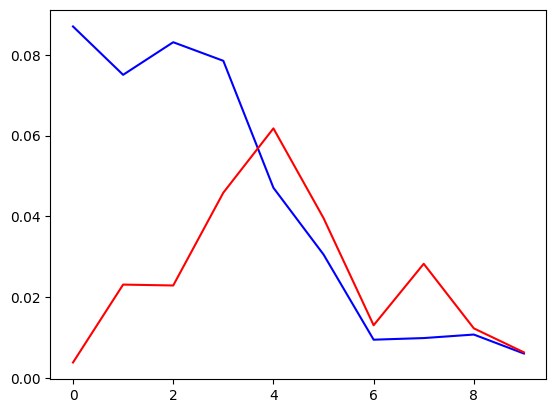

In [27]:
plt.plot(history.history['loss'],color='blue')
plt.plot(history.history['val_loss'],color='red')

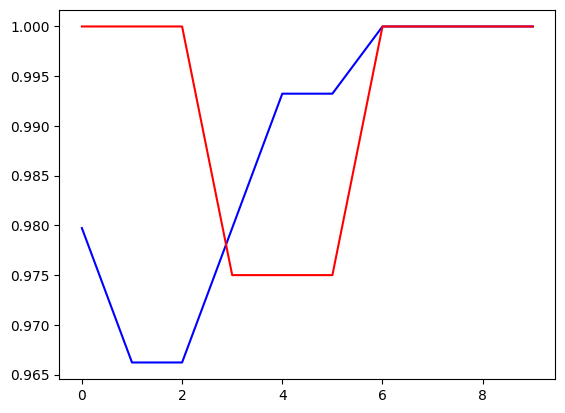

In [28]:
plt.plot(history.history['accuracy'],color='blue')
plt.plot(history.history['val_accuracy'],color='red')

In [29]:
y_pred = model.predict(test_generator)

2/2 ━━━━━━━━━━━━━━━━━━━━ 2s 263ms/step


In [30]:
y_pred

array([[1.00000000e+00],
       [8.46693729e-05],
       [9.99652922e-01],
       [1.00000000e+00],
       [9.99445260e-01],
       [9.99975324e-01],
       [2.12393606e-05],
       [9.99947667e-01],
       [9.99999762e-01],
       [2.09028798e-07],
       [4.35039583e-05],
       [1.50477514e-03],
       [8.98793769e-06],
       [9.99947011e-01],
       [5.83591114e-04],
       [9.98638749e-01],
       [8.84801224e-02],
       [1.06286996e-06],
       [1.00000000e+00],
       [5.89886440e-06],
       [9.99996841e-01],
       [1.41533553e-06],
       [1.00000000e+00],
       [8.44595070e-06],
       [1.00000000e+00],
       [9.99988735e-01],
       [1.06565075e-07],
       [4.56183898e-07],
       [9.99957860e-01],
       [3.77637552e-05],
       [9.99892354e-01],
       [9.99900222e-01],
       [9.99791682e-01],
       [2.66439485e-04],
       [1.00000000e+00],
       [4.12641498e-07],
       [2.26496395e-05],
       [1.00000000e+00],
       [1.44719452e-01],
       [4.55279951e-06]],

In [32]:
import numpy as np

In [33]:
y_pred_classes = np.round(y_pred)

In [34]:
y_pred_classes

array([[1.],
       [0.],
       [1.],
       [1.],
       [1.],
       [1.],
       [0.],
       [1.],
       [1.],
       [0.],
       [0.],
       [0.],
       [0.],
       [1.],
       [0.],
       [1.],
       [0.],
       [0.],
       [1.],
       [0.],
       [1.],
       [0.],
       [1.],
       [0.],
       [1.],
       [1.],
       [0.],
       [0.],
       [1.],
       [0.],
       [1.],
       [1.],
       [1.],
       [0.],
       [1.],
       [0.],
       [0.],
       [1.],
       [0.],
       [0.]], dtype=float32)